<a href="https://colab.research.google.com/github/pravinkucha/Deep-Learning/blob/master/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPool2D, Flatten ,Dropout
from keras import backend as k

Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape[0]

60000

ValueError: ignored

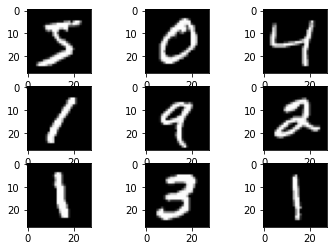

In [4]:
import matplotlib.pyplot as plt
for i in range(89):
  plt.subplot(330 + i + 1)
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
img_row,img_col = 28,28
print(k.image_data_format())
if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0],1,img_row,img_col)
  x_test  = x_test.reshape(x_test.shape[0],1,img_row,img_col)
  inpx = (1, img_row, img_col) 
else:
  x_train = x_train.reshape(x_train.shape[0],img_row,img_col,1)
  x_test  = x_test.reshape(x_test.shape[0],img_row,img_col,1)
  inpx = (img_row, img_col,1) 



channels_last


In [6]:
#convert from integers to floats
print(x_train.dtype)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
print(x_train.dtype)

uint8
float32


In [0]:
x_train /= 255
x_test /= 255

In [8]:
y_train = keras.utils.to_categorical(y_train)
y_test  = keras.utils.to_categorical(y_test)
inpx

(28, 28, 1)

In [0]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32,kernel_size=(3,3),activation='relu')(inpx)
layer2 = Conv2D(64,kernel_size=(3,3),activation='relu')(layer1)
layer3 = MaxPool2D(pool_size=(3,3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250,activation='sigmoid')(layer5)
layer7 = Dense(10,activation='softmax')(layer6)

In [10]:
obj_model = Model([inpx],layer7)
obj_model.compile(optimizer=keras.optimizers.Adadelta(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
obj_model.fit(x_train,y_train,epochs=12,batch_size=500)

Epoch 1/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.7238 - accuracy: 0.7779
Epoch 2/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.2303 - accuracy: 0.9344
Epoch 3/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.1394 - accuracy: 0.9606
Epoch 4/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.1005 - accuracy: 0.9710
Epoch 5/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0802 - accuracy: 0.9766
Epoch 6/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0686 - accuracy: 0.9800
Epoch 7/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0602 - accuracy: 0.9821
Epoch 8/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0525 - accuracy: 0.9847
Epoch 9/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0471 - accuracy: 0.9864
Epoch 10/12
60000/60000 [============================

In [11]:
score = obj_model.evaluate(x_test,y_test,verbose=0)
print(score)

[0.027691247458942234, 0.9904000163078308]


1


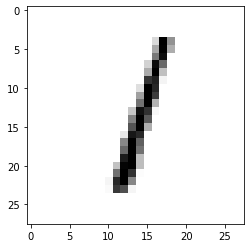

In [15]:
#sinle Value predication in number
predictions = obj_model.predict(x_test)
print(np.argmax(np.round(predictions[2])))

#sinle Value predication in graph (plot)
import matplotlib.pyplot as plt
plt.imshow(x_test[2].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        